KeyboardInterrupt: 

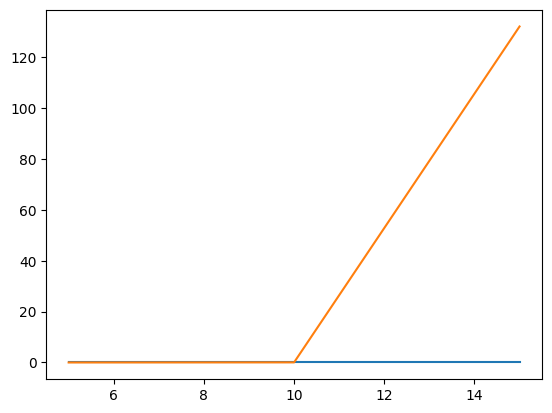

In [10]:
import time
import random
import matplotlib.pyplot as plt

# Import your functions here
from dynamic_program import min_edit_distance_dp
from recursive import med_recursive
from dynamic_program_memo import min_edit_distance_memo
from divide_n_conquer import min_edit_distance_dnc
from dynamic_program_space import min_edit_distance_space_optimized

# set recursion limit to 10^6


def generate_random_dna(length):
    return ''.join(random.choice('ACGT') for _ in range(length))

lengths = [5, 10,15]
# all dynamic programming functions
functions = [min_edit_distance_dp, med_recursive, min_edit_distance_dnc]
labels = ['Dynamic programming', 'Recursive', 'Divide and conquer']

for function, label in zip(functions, labels):
    times = []
    for length in lengths:
        dna1 = generate_random_dna(length)
        dna2 = generate_random_dna(length)

        start_time = time.time()
        function(dna1, dna2)
        end_time = time.time()

        elapsed_time = end_time - start_time
        times.append(elapsed_time)

    plt.plot(lengths, times, label=label)

plt.xlabel('DNA sequence length')
plt.ylabel('Execution time (seconds)')
plt.title('Scalability analysis')
plt.legend()
plt.show()

In [1]:

%pip install memory-profiler


ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'c:\\Python311\\Scripts\\mprof.exe' -> 'c:\\Python311\\Scripts\\mprof.exe.deleteme'



3
kitten-
*|||*|
sitting
DP-bottom up approach - Minimum edit distance: (2642, 'ACAAATATAACACAGGGAAGGTTAGGTATCTCTTTTT-ATTTGTATCTTCTGTATGGTTT-TCCTTATAAAA-AA--TG-C-AACCTACTTT-ACTTGCGAAACATGCCCTACTTTT-CT--TGCATGCTTTGCATAGAGTTGTTTCTAGTTATTCTATTATTTCTAGT-AGTTTTATTTACATATATTGATTATAATTTTAA-TACTTAGTAATCTTTTATTTTCCAGAGAAAACTAGGAAGT-AGAC-AGTTATAAACTGTCATATATTAGCATTCTATAGTAGGTTAGAAAATGTA-TGAATATACCAT-CTC-CCA--ACATCTAGAGGGATGTGTTTTCTCATAATACAATTCCTCAGTGTGGCAGAAAAAAACATGTTTATTAACGGGCCAAA-ATATCTTTAGTCTCTCTGTA-A-A-A-ACAGG-A-AGC-CA-A-A-A-GTATATAAACT-TGAATTATTTATGT-TCAGTAAT-T-AA--TGT--T-TT-AGTAT-TGTAT-CTTAT-TTA-TAA-ATGGT-CT--AG-A--T-ATTT---AA-T-GCAAATCTTTTACTTAGCTT-A-ACTTTA-AG-GTTAAAAATTAC-CAAAAG-TACTT-TG-GAA-A--CT-ATTCTT-AGGCAGAT-TTACTGTAAACAAATT-ATT-T-T-TGAAA-TAATGTTTTTCGCT-T-T-T-CACAAGACGGCA-C--CGAAAGCGAAGGAAGCTCCTGCTCCTCCTAAAGC--C-GAAGCCAAAGCGAAGGCCTTAAAGGC--CAAGAAG-GCAGTG-TTGA--AAG-GTGTCCG--CA--GC--CACACGCAAAAAAG-AAGATC--C--GC--AT-GTCACTCACCTTCAGGC-GGCCCAAGAC--ACTGCGACT-CCGGAG--GC-AG-C-C-CAGATATC-

C:\Users\Ahmed Shoaib\AppData\Local\Temp\ipykernel_8488\3189439486.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=labels, y=execution_times, palette="viridis")


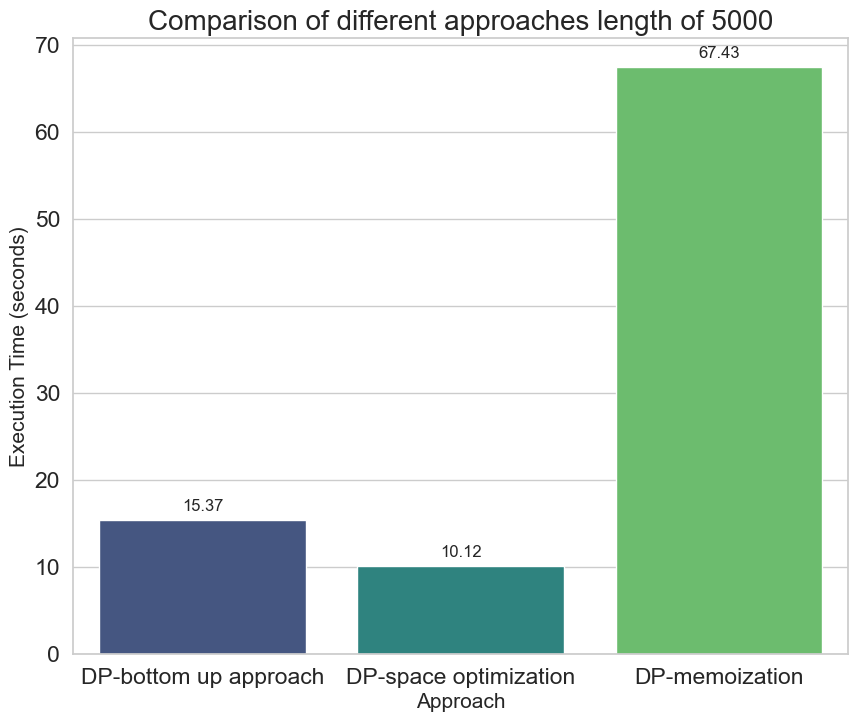

In [1]:
from dynamic_program_space import min_edit_distance_space_optimized
from dynamic_program import min_edit_distance_dp
from dynamic_program_memo import min_edit_distance_memo
import seaborn as sns
import time
import matplotlib.pyplot as plt
from memory_profiler import profile

import sys
sys.setrecursionlimit(10**6)

# Read the DNA sequences from the text files
with open('human_dna.txt', 'r') as file:
    human_dna = file.read().replace('\n', '')

with open('zebra_fish_dna.txt', 'r') as file:
    zebra_fish_dna = file.read().replace('\n', '')

# Calculate the minimum edit distance between the two DNA sequences

human_dna = human_dna[:5000]
zebra_fish_dna = zebra_fish_dna[:5000]

# Provide comparison between all the functions
functions = [min_edit_distance_dp,  min_edit_distance_space_optimized, min_edit_distance_memo]
labels = ['DP-bottom up approach', 'DP-space optimization', 'DP-memoization']

execution_times = []
memory_usage = []

for function, label in zip(functions, labels):
    start_time = time.time()
    distance = function(human_dna, zebra_fish_dna)
    end_time = time.time()

    
    elapsed_time = end_time - start_time
    execution_times.append(elapsed_time)

    print(f'{label} - Minimum edit distance: {distance}, Execution time: {elapsed_time} seconds')

# Set the style and context of the plot
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5)

# Create the bar plot
barplot = sns.barplot(x=labels, y=execution_times, palette="viridis")

# Set the labels and title
plt.xlabel('Approach', fontsize=15)
plt.ylabel('Execution Time (seconds)', fontsize=15)
plt.title('Comparison of different approaches length of 5000', fontsize=20)

# Add value labels on top of the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points',
                     fontsize = 12)

# Increase the size of the plot
plt.gcf().set_size_inches(10, 8)

# Show the plot
plt.show()

In [ ]:
# Set the style and context of the plot
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5)

# Create the bar plot
barplot = sns.barplot(x=labels, y=execution_times, palette="viridis")

# Set the labels and title
plt.xlabel('Approach', fontsize=15)
plt.ylabel('Execution Time (seconds)', fontsize=15)
plt.title('Comparison of different approaches length of 1000', fontsize=20)

# Add value labels on top of the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points',
                     fontsize = 12)

# Increase the size of the plot
plt.gcf().set_size_inches(10, 8)

# Show the plot
plt.show()

Filename: c:\Users\Ahmed Shoaib\ADA_project1\dynamic_program.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     5     44.6 MiB     44.6 MiB           1   def min_edit_distance_dp(s1, s2):
     6     44.6 MiB      0.0 MiB           1       len_s1 = len(s1)
     7     44.6 MiB      0.0 MiB           1       len_s2 = len(s2)
     8                                         
     9                                             # Create a table to store results of subproblems
    10   1177.5 MiB -16506570.8 MiB     1005007       dp = [[0 for _ in range(len_s2 + 1)] for _ in range(len_s1 + 1)]
    11                                             ops = [["" for _ in range(len_s2 + 1)] for _ in range(len_s1 + 1)]
    12                                         
    13   1053.9 MiB   -123.7 MiB        1002       # Initialize the table
    14   1053.9 MiB      0.1 MiB        1001       for i in range(len_s1 + 1):
    15   1053.9 MiB -146401.2 MiB        1002           dp[i][0] = i
 

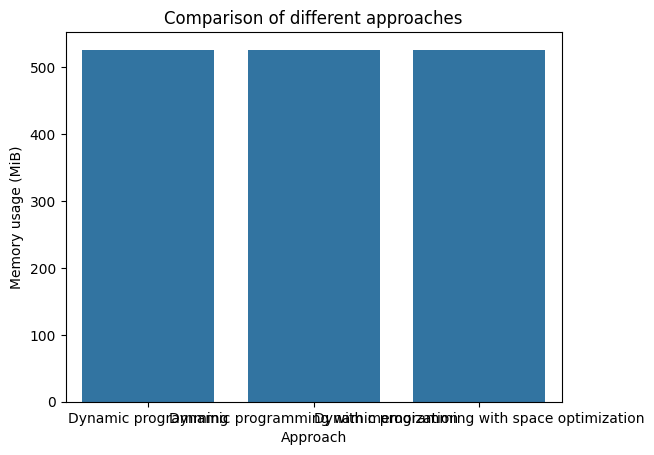

In [4]:
from dynamic_program_space import min_edit_distance_space_optimized
from dynamic_program import min_edit_distance_dp
from dynamic_program_memo import min_edit_distance_memo
import seaborn as sns
import time
import matplotlib.pyplot as plt
from memory_profiler import profile
import numpy as np

import sys
sys.setrecursionlimit(10**6)

# Read the DNA sequences from the text files
with open('human_dna.txt', 'r') as file:
    human_dna = file.read().replace('\n', '')

with open('zebra_fish_dna.txt', 'r') as file:
    zebra_fish_dna = file.read().replace('\n', '')

# Calculate the minimum edit distance between the two DNA sequences

human_dna = human_dna[:1000]
zebra_fish_dna = zebra_fish_dna[:1000]

# Provide comparison between all the functions
functions = [min_edit_distance_dp, min_edit_distance_memo, min_edit_distance_space_optimized]
labels = ['Dynamic programming', 'Dynamic programming with memoization', 'Dynamic programming with space optimization']

memory_usage = []

for function, label in zip(functions, labels):

    memory_profile = profile(function) 
    mem_usage = memory_profile(human_dna, zebra_fish_dna)
    memory_usage.append(mem_usage)
    print(memory_usage)


# Plot the memory usages
sns.barplot(x=labels, y=memory_usage)
plt.xlabel('Approach')
plt.ylabel('Memory usage (MiB)')
plt.title('Comparison of different approaches')
plt.show()